# NBA Trends

*A project to analyze National Basketball Association (NBA) data to look at associations between teams, win-rates, playoff appearances, and more.*

In this project, I analyzed data from the NBA (National Basketball Association) and explored possible associations. 

This data was originally sourced from 538's Analysis of the [Complete History Of The NBA](http://fivethirtyeight.com/interactives/the-complete-history-of-every-nba-team-by-elo) and contains the original, unmodified data from [Basketball Reference](http://www.basketball-reference.com/) as well as several additional variables 538 added to perform their own analysis. 

You can read more about the data and how it's being used by 538 [here](https://github.com/fivethirtyeight/data/tree/master/nba-elo). For this project the data is limited to just 5 teams and 10 columns (plus one constructed column, `point_diff`, the difference between `pts` and `opp_pts`).

I have created several charts and tables in this project to explore relationships between variables.


### Setup
- import all necessary libraries
- make the output look nicer
- read the csv file and preview the data
- Subset the Data to 2010 Season, 2014 Season

In [1]:
# import all necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# make the output look nicer
np.set_printoptions(suppress=True, precision = 2)

In [3]:
# read the csv file and preview the data
nba = pd.read_csv('nba_games.csv')
nba.head()

,game_id,year_id,fran_id,opp_fran,game_location,is_playoffs,pts,opp_pts,game_result,forecast,point_diff
0,194611010TRH,1947,Knicks,Huskies,A,0,68,66,W,0.359935,2
1,194611020CHS,1947,Knicks,Stags,A,0,47,63,L,0.368899,-16
2,194611020PRO,1947,Celtics,Steamrollers,A,0,53,59,L,0.359935,-6
3,194611050BOS,1947,Celtics,Stags,H,0,55,57,L,0.620204,-2
4,194611070STB,1947,Knicks,Bombers,A,0,68,63,W,0.339290,5


In [4]:
# Subset the Data to 2010 Season, 2014 Season
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

### Step 1
The data has been subset into two smaller datasets: games from 2010 (named nba_2010) and games from 2014 (named nba_2014). To start, let’s focus on the 2010 data.

I wanted to compare the knicks to the nets with respect to points earned per game. Using the pts column from the nba_2010 DataFrame, I created two series named knicks_pts_2010 (fran_id = "Knicks") and nets_pts_2010(fran_id = "Nets") that represent the points each team has scored in their games.


In [5]:
knicks_pts_2010 = nba_2010[nba_2010.fran_id == 'Knicks']['pts']
nets_pts_2010 = nba_2010[nba_2010.fran_id == 'Nets']['pts']

### Step 2

I calculated the difference between the two teams’ average points scored and saved the result as diff_means_2010. 

In [6]:
knicks_pts_average_2010 = knicks_pts_2010.mean()
nets_pts_average_2010 = nets_pts_2010.mean()
diff_means_2010 = knicks_pts_average_2010 - nets_pts_average_2010
print(diff_means_2010)

9.731707317073173


**Question and Answer:**

Using the value 'diff_means_2010', I answered the following question: Do you think fran_id and pts are associated? Why or why not?

The calculated difference between the average points scored by the Knicks and the Nets in 2010 is 9.731707. This positive difference suggests that, on average, the Knicks score approximately 9.73 more points than the Nets.

As for whether 'fran_id' and 'pts' are associated, the observed difference alone does not provide conclusive evidence. To better assess the association between 'fran_id' and 'pts', further statistical analysis, such as hypothesis testing or regression analysis, would be needed.

The difference in average points scored may be influenced by various factors, including team strategies, player performance, or teams played. Therefore, a more comprehensive statistical analysis should be performed which considers additional variables and factors to draw meaningful conclusions about the association between 'fran_id' and 'pts'.

### Step 3
Rather than only comparing means, it is useful to look at the full distribution of values to understand whether a difference in means is meaningful. I created a set of overlapping histograms to compare the points scored for the Knicks compared to the Nets using the series created in Step 1 and the code below to create the plot. 

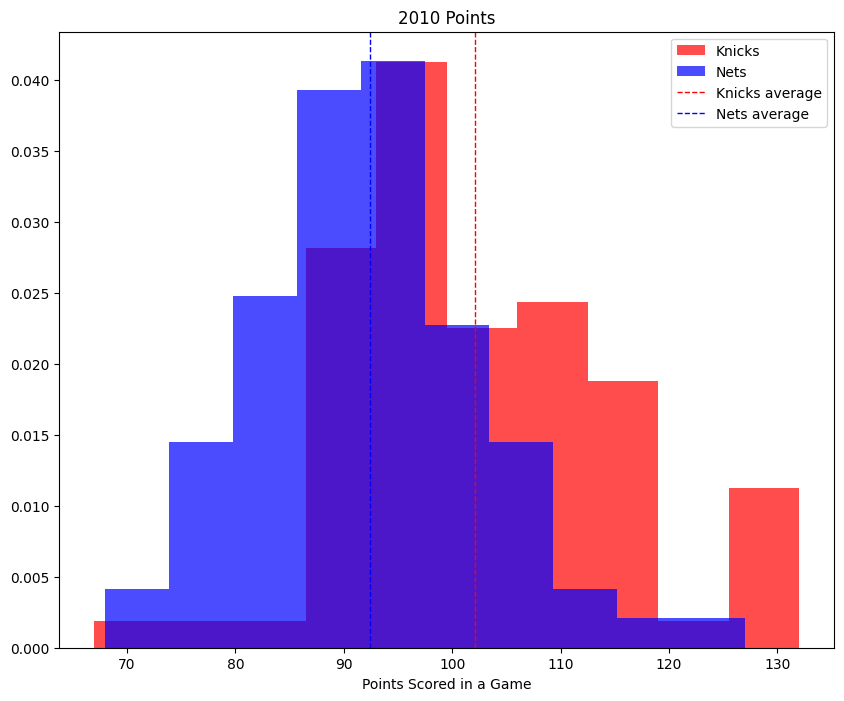

In [7]:
plt.figure(figsize = (10, 8))
plt.hist(knicks_pts_2010, label="Knicks", alpha=0.7, color='red', density = True)
plt.hist(nets_pts_2010, label="Nets", alpha=0.7, color='blue', density = True)
plt.axvline(knicks_pts_average_2010, linestyle='dashed', color='red', linewidth=1, label='Knicks average')
plt.axvline(nets_pts_average_2010, linestyle='dashed', color='blue', linewidth=1, label='Nets average')
plt.legend()
plt.title('2010 Points')
plt.xlabel('Points Scored in a Game')
plt.savefig('2010_points.png')
plt.show()


**Question and Answer:**

Using the histogram above I answered the following questions. Do the distributions appear to be the same? Does the mean difference calculated make sense?

The visual analysis of the overlapping histograms indicates some patterns in the distribution of points scored by the Knicks and the Nets. The Knicks' histogram displays more of a left skew, implying a higher frequency of higher points scored in games. This observation is consistent with the understanding that the Knicks score more points on average. 

The Nets' histogram exhibits characteristics of a normal distribution with a subtle right skew, aligning with the expectation that they average fewer points. However, both teams look to have a similar mode value between 90 and 100.

In summary, the visual comparison of the histograms reinforces the notion that the Knicks and the Nets have distinct scoring patterns. The Nets' distribution leans towards normality, reflecting a consistent but lower-scoring performance, while the Knicks' distribution exhibits left skewness, indicative of more varied, but higher-scoring performances.

### Step 4
Now, let’s compare the 2010 games to 2014. I replicated the steps from Steps 1 and 3 using `nba_2014`. First, calculating the mean difference between the two teams points scored and printing the value as `diff_means_2014`. I then plotted the points as overlapping histograms.

0.44706798131809933


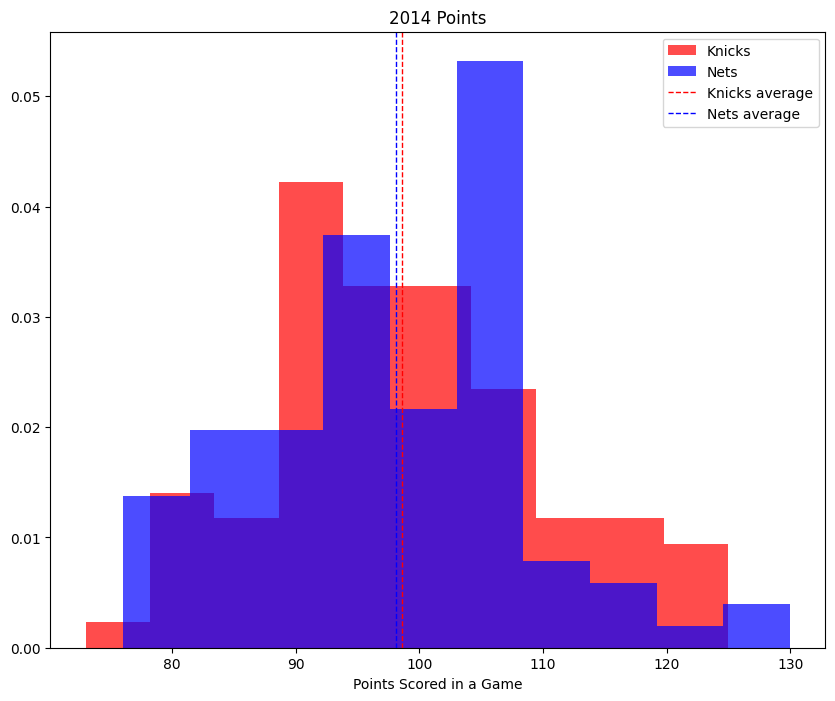

In [8]:
# create the series of points for each franchise in 2014
knicks_pts_2014 = nba_2014[nba_2014.fran_id == 'Knicks']['pts']
nets_pts_2014 = nba_2014[nba_2014.fran_id == 'Nets']['pts']

# Find the average points for each and then calculate the difference
knicks_pts_average_2014 = knicks_pts_2014.mean()
nets_pts_average_2014 = nets_pts_2014.mean()
diff_means_2014 = knicks_pts_average_2014 - nets_pts_average_2014
print(diff_means_2014)

# create overlapping histograms
plt.figure(figsize = (10, 8))
plt.hist(knicks_pts_2014, label="Knicks", alpha=0.7, color='red', density = True)
plt.hist(nets_pts_2014, label="Nets", alpha=0.7, color='blue', density = True)
plt.axvline(knicks_pts_average_2014, linestyle='dashed', color='red', linewidth=1, label='Knicks average')
plt.axvline(nets_pts_average_2014, linestyle='dashed', color='blue', linewidth=1, label='Nets average')
plt.legend()
plt.title('2014 Points')
plt.xlabel('Points Scored in a Game')
plt.savefig('2014_points.png')
plt.show()

**Question and Answer:**

I used my above calculations and visualization to answer the following questions: Did the difference in points get larger or smaller in 2014? Does the mean difference you calculated make sense?

The calculated difference between the average points scored by the Knicks and the Nets in 2014 was 0.447068. This positive difference suggests that, on average, the Knicks score approximately 0.45 more points than the Nets. Although the Knicks still have a higher average, it is noteworthy that the difference is considerably smaller than the significant gap observed in 2010, which was 9.73 points.

Upon examining the histogram of points for both teams in 2014, the diminished average difference aligns with the visual representation of their respective distributions. Notably, the distributions cover roughly similar ranges, with the Knicks maintaining a slightly higher average. However, unlike the distinct disparity seen in 2010, the 2014 plot reveals a more nuanced pattern.

Within the 2014 histogram, both teams exhibit modes, with the Nets displaying two distinct modes. The first mode, observed between 100 and 110 points, is notably higher than the corresponding Knicks mode situated between 85 and 95 points. Additionally, the Nets demonstrate a second, albeit lower, mode within the range of 90 to 100 points along with an overall right skew to their graph, indicating the mean and median are more likely to be closer to the lower mode (90-100). In contrast, the Knicks exhibit a more normal distribution around their mode, with a very slight left skew suggesting a higher mean and median.

In summary, the much lower mean difference (0.45) makes sense because the overlapping histograms reveal a convergence in scoring patterns, with the Knicks maintaining a slightly higher average. The Nets exhibit a bimodal distribution, indicating consistent scoring between 100 and 110 points and another mode in the 90 to 100 point range. The smaller mean difference aligns with the visual evidence, emphasizing a more aligned scoring dynamic between the two teams in 2014.

### Step 5
For the remainder of this project, I will focus on the data from 2010. Let’s now include all teams in the dataset and investigate the relationship between franchise and points scored per game.

Using nba_2010, I generated side-by-side boxplots with points scored (pts) on the y-axis and team (fran_id) on the x-axis. 

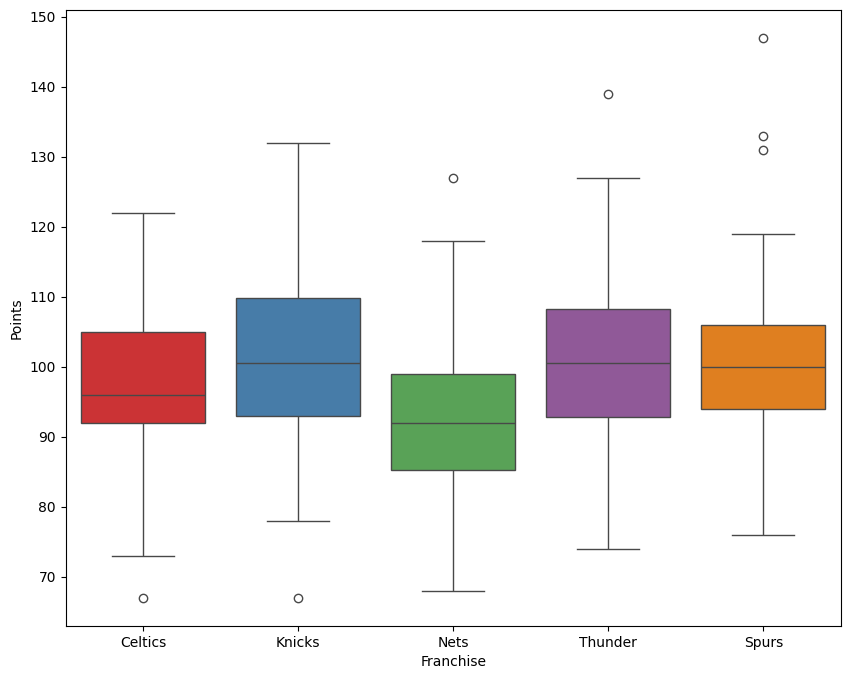

In [9]:
plt.figure(figsize = (10, 8))
sns.boxplot(data=nba_2010, x='fran_id', y='pts', hue='fran_id', palette='Set1')
plt.xlabel('Franchise')
plt.ylabel('Points')
plt.savefig('franchise_and_points_sidebyside_boxplot.png')
plt.show()

**Question and Answer:**

I used my boxplot to answer the following questions: Is there any overlap between the boxes? Does this chart suggest that fran_id and pts are associated? Which pairs of teams, if any, earn different average scores per game?

In the side-by-side boxplots of 'pts' and 'fran_id' in the 'nba_2010' dataset, notable overlap exists among all the boxes, indicating similarities in scoring distributions. No team stands entirely by itself, suggesting that various franchises exhibit comparable scores per game. Specifically, the Knicks, Spurs, and Thunder share a pronounced overlap, while the Celtics and Nets, stand with lower averages, although even these two lower plots still overlap with the other three. This overlapping pattern across franchises indicates a weak association between our variables 'fran_id' and 'pts'.

### Step 6
I wanted to know if teams tend to win more games at home compared to away.

The variable, `game_result`, indicates whether a team won a particular game ('W' stands for “win” and 'L' stands for “loss”). The variable, `game_location`, indicates whether a team was playing at home or away ('H' stands for “home” and 'A' stands for “away”). 

I calculated a contingency table of frequencies to help determine if these two categorical variables are associated. The table of frequencies shows the counts of game_result and game_location saved as `location_result_freq`. 


In [10]:
location_result_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
location_result_freq

game_location,A,H
game_result,,
L,133,105
W,92,120


**Question and Answer:**

Using the table I answered the following question: do you think the variables are associated?

With a quick glance at the table I notice there are more wins at Home and more losses Away indicating a potential association. However, based solely on the table it is hard to tell if the variables 'game_location' and 'game_result' are associated. Further testing such as a chi-square test and obtaining the p-value will need to be performed.

### Step 7

I converted the table of frequencies to a table of proportions and saved the result as `location_result_proportions`.

In [11]:
location_result_proportions = location_result_freq/len(nba_2010)
location_result_proportions

game_location,A,H
game_result,,
L,0.295556,0.233333
W,0.204444,0.266667


### Step 8
Using the contingency table created above (Step 6), I calculated the expected contingency table (if there were no association) and the Chi-Square statistic.

In [12]:
chi2, pval, dof, expected = chi2_contingency(location_result_freq)
print(expected)
print(chi2)

[[119. 119.]
 [106. 106.]]
6.501704455367053


**Question and Answer:**

Using my calculations I answered the following questions: Does the actual contingency table look similar to the expected table — or different? Based on this output, do you think there is an association between these variables?

The value of the Chi-squared is approximately 6.5. For a 2x2 table, a Chi-squared greater than about 4 indicates an association and ours has exceeded that, indicating strong evidence our variables 'game_result' and 'game_location' are associated. In our case, the relationship would be that a team is more likely to win at a Home game than at an Away game. 

### Step 9

For each game, 538 has calculated the probability that each team will win the game. I wanted to know if teams with a higher probability of winning (according to 538) also tend to win games by more points. 

In the data, 538's prediction is saved as `forecast`. The `point_diff` column gives the margin of victory/defeat for each team (positive values mean that the team won; negative values mean that they lost). 

Using `nba_2010`, I calculated the covariance between `forecast` (538's projected win probability) and `point_diff` (the margin of victory/defeat) in the dataset.


In [13]:
forecast_point_diff_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(forecast_point_diff_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


**Question and Answer:**

Using the matrix I answered the following question: what is the covariance between these two variables? 

The covariance matrix indicates a positive covariance of 1.37 between 'forecast' and 'point_diff.' This positive value signifies a direct relationship: as the 'forecast' variable increases, there is a tendency for 'point_diff' to also increase. Although the covariance gives insight to the direction of the relationship, we would need the correlation coefficient and p-value to determine the strength. 

### Step 10

Because 538’s forecast variable is reported as a probability (not a binary), I was able to calculate the strength of the correlation.

Using nba_2010, I calculated the correlation between `forecast` and `point_diff` and called it `point_diff_forecast_corr`. 

In [14]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
point_diff_forecast_corr

PearsonRResult(statistic=0.4402088708468082, pvalue=9.410391573139846e-23)

**Question and  Answer:**

Using the correlation coefficient and pvalue I answered the following question: Do these values suggest an association between the two variables?

The correlation coefficient between 'forecast' and 'point_diff' is 0.44, signifying a positive relationship that aligns with the previously observed positive covariance. However, the coefficient falls below 0.5, suggesting a relatively weak correlation between these variables. In comparison to a strong relationship, defined as a coefficient of 0.7 or greater, the observed value indicates a moderate linear association.

The p-value, approaching zero, further supports this conclusion. With a p-value below the common significance level of 0.05, we reject the null hypothesis that the two variables are unrelated. This statistically significant result adds weight to the interpretation that there is indeed a relationship between 'forecast' and 'point_diff,' albeit a moderate one. 

### Step 11

I then generated a scatter plot of `forecast` (on the x-axis) and `point_diff` (on the y-axis). I also made the line of best fit to better view the relationship. 

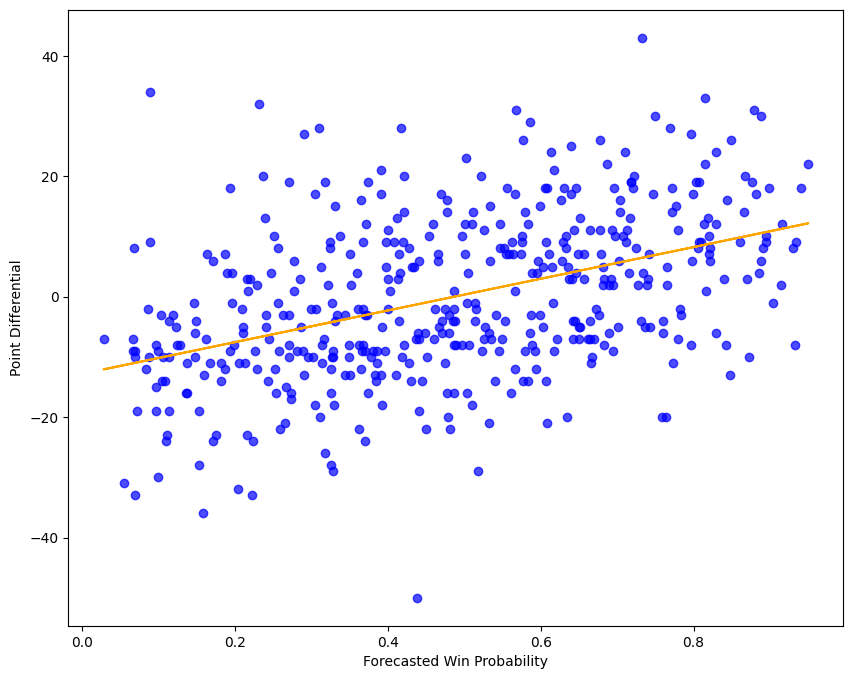

In [15]:
# Use linear regression to create a line of best fit
model = sm.OLS.from_formula('point_diff ~ forecast', data = nba_2010)
results = model.fit()
intercept, slope = results.params

line = slope*nba_2010['forecast'] + intercept

# Plot the data
plt.figure(figsize = (10, 8))
plt.scatter(x = nba_2010.forecast, y = nba_2010.point_diff, color='blue', alpha=0.7)
plt.plot(nba_2010.forecast, line, color='orange')
plt.xlabel('Forecasted Win Probability')
plt.ylabel('Point Differential')
plt.savefig('forecast_and_points_scatterplot.png')
plt.show()

**Question and Answer:**

Using the scatterplot I made the following observations:

The scatterplot provides visual reinforcement for the correlation value of 0.44, illustrating a moderately positive and present relationship between 'forecast' and 'point_diff.' While the correlation is not strong, the scatterplot visually confirms the direction of the association, affirming that as 'forecast' increases, 'point_diff' tends to rise as well. 